In [1]:
# logistic regression is also called classifier
# sin(x) = 1/1+pow(e,x)
# logistic classifier/regression is basically used to classify only two categories (1 or 0)(true or false)
# (tumor or no tumor)(covid or no covid)

In [2]:
# if your output column has two possible output then only logistic regression  is most suitable choice 
# if your data set contains no of columns as input feature ans some columnsas an output or dependent feature
# input may have single independent variable or multiple indidpendent variables but if your output column 
# containsonly two possibilities  in this case  only logistic regression  is most suitable choice 

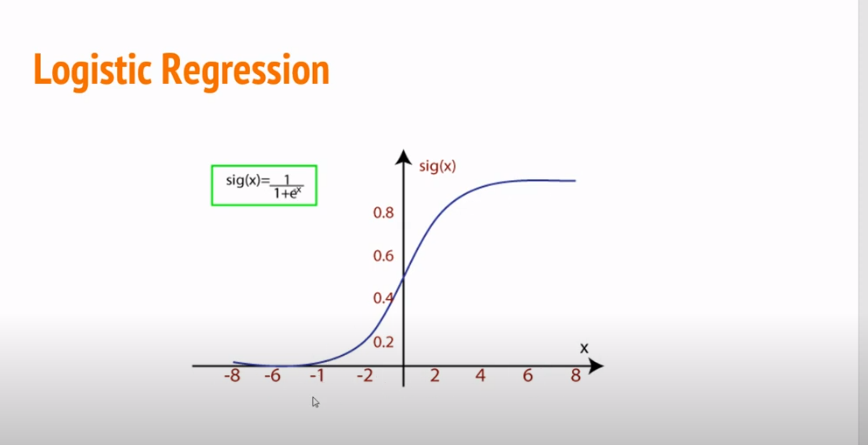


In [3]:
# this is a sigmoid function either is high or low . 
# this type of regression is callled binary regression cuz it product only two output values`
#  social network sites - car advertisement on social media
# we have to predict whether that person will purchase the car it depends on age and estimated salary
# to do smart marketing for any advertisement 

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# loading the dataset
data_set = pd.read_csv('./DATA_SETS/Social_Network_Ads_logistic_regression.csv')


print(data_set.head())
# ignore user_ID and gender as features
# mainly focus on age and estimated salary  as input variables
# purchased as target variables

# step 4 : Encoding the dummy variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# encoding is used to convert categorical value into numeric term
print("Before Encoding",data_set['Gender'])
# x[ :,3]  means all rows , only 3rd column / state
data_set['Gender'] = le.fit_transform(data_set['Gender'].tolist())  
print("After Encoding",data_set['Gender'])
#  as tolist() as we are extracting column from numpy dataframe


    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
Before Encoding 0        Male
1        Male
2      Female
3      Female
4        Male
        ...  
395    Female
396      Male
397    Female
398      Male
399    Female
Name: Gender, Length: 400, dtype: object
After Encoding 0      1
1      1
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: Gender, Length: 400, dtype: int64


In [5]:
# step 3 : extracting the predictors and target variables 
predictors = ['Gender','Age', 'EstimatedSalary']
target = ['Purchased']

x = data_set[predictors].values
y = data_set[target].values

print(x) 
# thus in 1st column we can see 1100 for male/female gender

[[    1    19 19000]
 [    1    35 20000]
 [    0    26 43000]
 ...
 [    0    50 20000]
 [    1    36 33000]
 [    0    49 36000]]


In [6]:
# setp 4 : splitting the dataset
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state =0)

In [7]:
# step 5: Feature scaling (additional new )
#  age is below 100 and estimated salary in 10000 atleast 4 to 5 digit number value like 19000
# between these two input features there is huge difference thats why we are using feature scaling 
# both input features are having different features and difference between their values is huge 
# so in such case we have to scale down to features
# example  - friut identification if fruit size is different then it is difficult to train the model with this data
# in most cases we use euclidean distance so that difference between them becomes a standard 

In [8]:
# step 5: Feature Scaling (additional new)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

print(x_test)
# here 1 column is age and 2nd column is salary
# after scaling we can see there is no huge difference between these columns where as earlier
# now these two columns have identical range 

[[ 1.         -0.49618606  0.56021375]
 [-1.          0.2389044  -0.59133674]
 [ 1.         -0.03675452  0.18673792]
 [-1.         -0.49618606  0.31122986]
 [-1.         -0.03675452 -0.59133674]
 [ 1.         -0.77184498 -1.52502632]
 [-1.         -0.40429975 -1.68064126]
 [ 1.          0.05513178  2.33422397]
 [-1.         -1.59882175 -0.03112299]
 [ 1.          1.06588117 -0.80919764]
 [ 1.         -0.49618606 -0.62245972]
 [-1.         -0.67995868 -0.43572181]
 [ 1.          0.14701809 -0.43572181]
 [ 1.          0.33079071  0.24898389]
 [ 1.         -1.41504914  0.52909077]
 [-1.         -0.31241345  1.49390334]
 [ 1.          0.14701809  0.24898389]
 [ 1.         -1.50693545  0.49796778]
 [-1.          1.80097163  1.89850216]
 [ 1.         -0.03675452 -1.46278035]
 [-1.         -0.03675452 -0.6847057 ]
 [-1.          1.06588117  2.33422397]
 [-1.          0.51456332 -0.56021375]
 [ 1.          1.06588117  1.1204275 ]
 [-1.         -1.13939022 -1.27604243]
 [-1.          1.24965379

In [9]:
# step 6: fitting the model 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state =0)
classifier.fit(x_train, y_train)
# fit function passing the train set   80 % data 
# confusion matrix 

print("Performance :", classifier.score(x_train ,y_train))


Performance : 0.825


/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
# whenever we are doing classification kind of stuff mostly we have to classify only two categories zeros and ones
# so it is a kind of classification 
# we use confusion matrix --all about true positives , true negatives , false positivesand false negative

# confusion matrix      first is metrix  later is matrix
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(x_test)

print(y_pred)
# extra step

cm = confusion_matrix(y_test ,y_pred)
# true values verses predicted values pai condfusion matrix is formed
print(cm)
# 52 is true positive values
# 19 is true negative values
# confusion matrix depends on how many categories you are having 
# if you have 2 categories in target variable then print (2*2) matrix
# if 3 categories in target variable thrn print (3*3) matrix

# 52+6 = 58   if provide 58 people name(details) who have purchaged car 
# here52 have purchaged the car(prediction is correct) 
# then the 6 have purchaged car but the model predicted wrong thus shows they have Not bought car 

# 19+3 = 22  if provide 22 people details who have NOT purchaged car 
# here 19 have Not purchaged the car (prediction is correct)
# and only 3 who have not purchaged car but the model predicted wrong thus shows they have bought car

# in this matrix main diagnol elementys 52 and 19 poeple data has been predicted corrects
# total incorrect prediction is 3+6 =  9
# 52(true positive)   6(false negative)
# 3(false positive)  19 (true negative)

[0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 1 1]
[[52  6]
 [ 3 19]]


In [ ]:
# prediction on real time input from user
gender = int (input("Enter the \n male for 1  and \n female for 0 :"))
age = int (input("Enter the age :"))
salary = int(input("Enter the Salary :"))
test_sample = [[gender,age ,salary]]

test_sample = sc.fit_transform(test_sample)
# we have scaled the feature then given it to the system 
# if we do not do that we will get wrong result 
# cuz at training time we give scale down features 
# thus at testing time we have to provide scale down features

result = classifier.predict(test_sample)
print("Purchasing Status :",result)

# Purchasing Status : [0]  means car is not  purchaged

# result is a single dimentional array
if(result[0]==0):
    print("Person has NOT purchased the car")
else:
    print("Person has  purchased the car")
    
#     Female,47,30000,1
# Female,47,47000,0